In [1]:
from CargaMat1 import listar_archivos_mat,load_emg
from Filtro import butter_filter
from Preprocesamiento import window_slicing_time, Corte30s, Etiquetador

import pandas as pd

Primero Cargar los archivos 

In [2]:
pathlist=listar_archivos_mat("SEÑALES EMG")
print(pathlist)

['SEÑALES EMG\\SUJETO1\\M1_JUAN_VANEGAS.mat', 'SEÑALES EMG\\SUJETO1\\M2_JUAN_VANEGAS.mat', 'SEÑALES EMG\\SUJETO1\\M3_JUAN_VANEGAS.mat', 'SEÑALES EMG\\SUJETO2\\M1_SARA_MANCO.mat', 'SEÑALES EMG\\SUJETO2\\M2_SARA_MANCO.mat', 'SEÑALES EMG\\SUJETO2\\M3_SARA_MANCO.mat', 'SEÑALES EMG\\SUJETO3\\M1_CAMILA_ROA.mat', 'SEÑALES EMG\\SUJETO3\\M2_CAMILA_ROA.mat', 'SEÑALES EMG\\SUJETO3\\M3_CAMILA_ROA.mat', 'SEÑALES EMG\\SUJETO4\\M1_SARA_SALAMANCA.mat', 'SEÑALES EMG\\SUJETO4\\M2_SARA_SALAMANCA.mat', 'SEÑALES EMG\\SUJETO4\\M3_SARA_SALAMANCA.mat', 'SEÑALES EMG\\SUJETO5\\M1_SARA_MARIN.mat', 'SEÑALES EMG\\SUJETO5\\M2_SARA_MARIN.mat', 'SEÑALES EMG\\SUJETO5\\M3_SARA_MARIN.mat', 'SEÑALES EMG\\SUJETO6\\M1_JUAN_GIRALDO.mat', 'SEÑALES EMG\\SUJETO6\\M2_JUAN_GIRALDO.mat', 'SEÑALES EMG\\SUJETO6\\M3_JUAN_GIRALDO.mat', 'SEÑALES EMG\\SUJETO7\\M1_LEON_ARBOLEDA.mat', 'SEÑALES EMG\\SUJETO7\\M2_LEON_ARBOLEDA.mat', 'SEÑALES EMG\\SUJETO7\\M3_LEON_ARBOLEDA.mat']


In [3]:
señalejemplo = 0

In [4]:
M1=load_emg(pathlist[señalejemplo])
M1

,Biceps,Triceps,tiempo
0,-3.125000e-07,-0.000002,0.0000
1,-4.562500e-06,-0.000026,0.0005
2,-1.912500e-05,-0.000103,0.0010
3,-4.781250e-05,-0.000241,0.0015
4,-8.790625e-05,-0.000414,0.0020
...,...,...,...
68384,-2.255937e-04,-0.000803,34.1920
68385,-2.342500e-04,-0.000805,34.1925
68386,-2.331250e-04,-0.000776,34.1930
68387,-2.238750e-04,-0.000723,34.1935


Filtrado de las Señales EMG

In [5]:
lista_de_Muestras = [] 
for i in pathlist:
    print(i)
    M=load_emg(i)
    biceps = M['Biceps']
    triceps = M['Triceps']
    time = M['tiempo']

    biceps_filt = butter_filter(biceps, lowcut=20, highcut=250, fs=2000, btype='band')
    biceps_filt = butter_filter(biceps, lowcut=58, highcut=62, fs=2000, btype='bandstop')
    triceps_filt = butter_filter(triceps, lowcut=20, highcut=250, fs=2000, btype='band')
    triceps_filt = butter_filter(triceps, lowcut=58, highcut=62, fs=2000, btype='bandstop')

    dt=[biceps_filt,triceps_filt,time]
    cua=pd.DataFrame(data=dt,index=["Biceps","Triceps","tiempo"])
    Mf=cua.T

    lista_de_Muestras.append(Mf)

SEÑALES EMG\SUJETO1\M1_JUAN_VANEGAS.mat
SEÑALES EMG\SUJETO1\M2_JUAN_VANEGAS.mat
SEÑALES EMG\SUJETO1\M3_JUAN_VANEGAS.mat
SEÑALES EMG\SUJETO2\M1_SARA_MANCO.mat
SEÑALES EMG\SUJETO2\M2_SARA_MANCO.mat
SEÑALES EMG\SUJETO2\M3_SARA_MANCO.mat
SEÑALES EMG\SUJETO3\M1_CAMILA_ROA.mat
SEÑALES EMG\SUJETO3\M2_CAMILA_ROA.mat
SEÑALES EMG\SUJETO3\M3_CAMILA_ROA.mat
SEÑALES EMG\SUJETO4\M1_SARA_SALAMANCA.mat
SEÑALES EMG\SUJETO4\M2_SARA_SALAMANCA.mat
SEÑALES EMG\SUJETO4\M3_SARA_SALAMANCA.mat
SEÑALES EMG\SUJETO5\M1_SARA_MARIN.mat
SEÑALES EMG\SUJETO5\M2_SARA_MARIN.mat
SEÑALES EMG\SUJETO5\M3_SARA_MARIN.mat
SEÑALES EMG\SUJETO6\M1_JUAN_GIRALDO.mat
SEÑALES EMG\SUJETO6\M2_JUAN_GIRALDO.mat
SEÑALES EMG\SUJETO6\M3_JUAN_GIRALDO.mat
SEÑALES EMG\SUJETO7\M1_LEON_ARBOLEDA.mat
SEÑALES EMG\SUJETO7\M2_LEON_ARBOLEDA.mat
SEÑALES EMG\SUJETO7\M3_LEON_ARBOLEDA.mat


In [ ]:
a=lista_de_Muestras[señalejemplo]
a

,Biceps,Triceps,tiempo
0,-0.000018,0.000004,0.0000
1,0.000001,0.000063,0.0005
2,0.000011,0.000067,0.0010
3,0.000005,0.000005,0.0015
4,-0.000014,-0.000101,0.0020
...,...,...,...
68384,-0.000099,-0.000355,34.1920
68385,-0.000114,-0.000393,34.1925
68386,-0.000123,-0.000414,34.1930
68387,-0.000129,-0.000423,34.1935


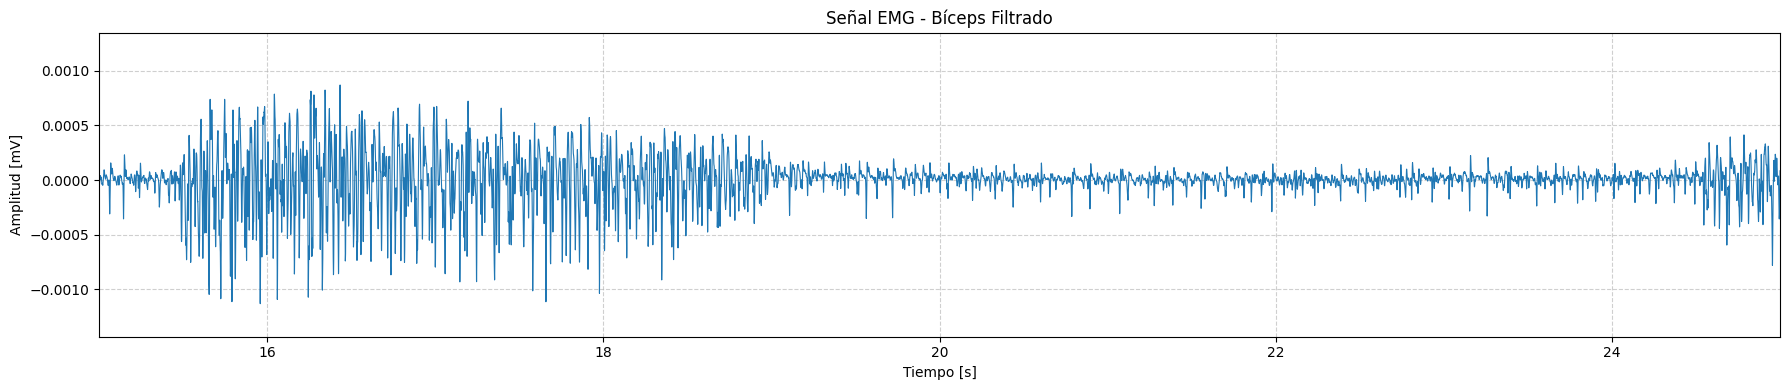

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))
plt.plot(a['tiempo'],a['Biceps'],linewidth=0.8)
plt.xlim([15,25])
plt.title("Señal EMG - Bíceps Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

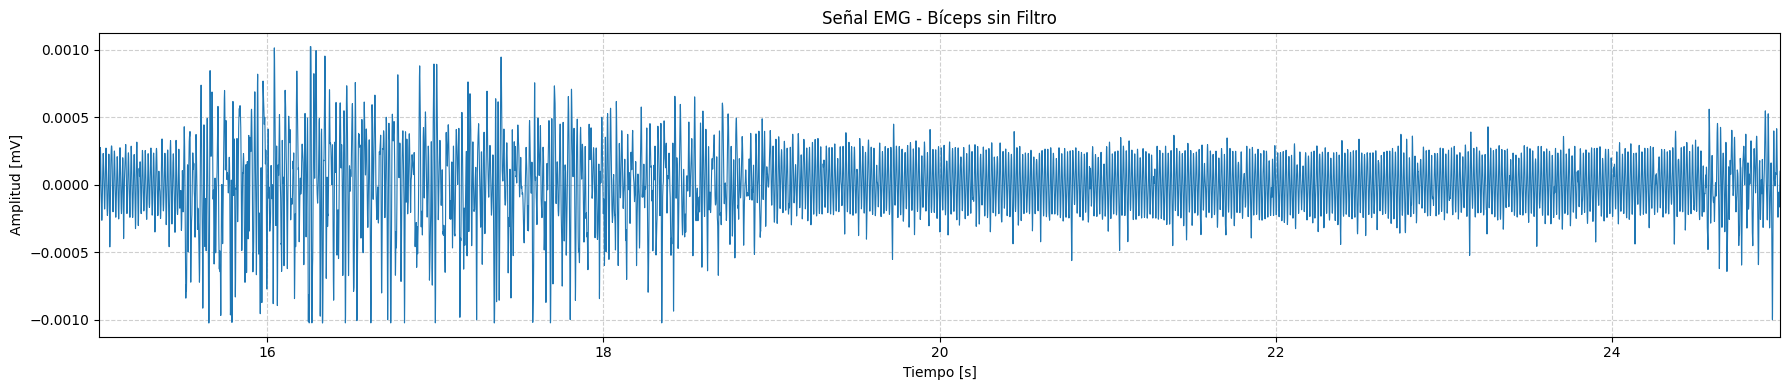

In [8]:
plt.figure(figsize=(18, 4))
plt.plot(M1['tiempo'],M1['Biceps'],linewidth=0.8)
plt.xlim([15,25])
plt.title("Señal EMG - Bíceps sin Filtro")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Corte de las Señales hasta 30s

In [9]:
lista_de_Ventanas_30s=Corte30s(lista_de_Muestras)

Procesando señal 1/21
  Duración original: 34.194s (de 0.000s a 34.194s)
  Duración final: 30.000s
  Filas originales: 68389, Filas finales: 60001
  Filas eliminadas: 8388

Procesando señal 2/21
  Duración original: 29.844s (de 0.000s a 29.844s)
  Duración final: 29.844s
  Filas originales: 59689, Filas finales: 59689
  Filas eliminadas: 0

Procesando señal 3/21
  Duración original: 32.394s (de 0.000s a 32.394s)
  Duración final: 30.000s
  Filas originales: 64789, Filas finales: 60001
  Filas eliminadas: 4788

Procesando señal 4/21
  Duración original: 30.644s (de 0.000s a 30.644s)
  Duración final: 30.000s
  Filas originales: 61289, Filas finales: 60001
  Filas eliminadas: 1288

Procesando señal 5/21
  Duración original: 32.544s (de 0.000s a 32.544s)
  Duración final: 30.000s
  Filas originales: 65089, Filas finales: 60001
  Filas eliminadas: 5088

Procesando señal 6/21
  Duración original: 30.994s (de 0.000s a 30.994s)
  Duración final: 30.000s
  Filas originales: 61989, Filas finale

Carga de los puntos de onset y offset 

In [10]:
df_times = pd.read_csv("promedio_final.csv", sep=';')
print (df_times)

  onset 1 offset 1 onset 2 offset 2 onset 3 offset 3  SUJETO
0   5,245    10,25  14,958   19,945  25,065   29,916       1
1   5,284   10,261   15,31   19,982  25,186    29,93       2
2   5,574   10,486  15,152   20,046  25,168   29,996       3
3   5,245    10,05  15,509   19,856  25,409   29,915       4
4   5,391   10,283  15,198   20,246  25,295   30,085       5
5   5,253   10,195  15,096   20,175   24,93   30,015       6
6   5,434   10,593  15,325   20,289  25,365   30,001       7


Función de Etiquetado: Extrae las ventanas de contracción y relajación, recibe la lista de muestras y el dataset de onset y offset. Entrega una lista que contiene las ventanas en forma de lista posición 0 datos de voltaje de la ventana y posición 1 la etiqueta de la ventana 

In [11]:
Vent_eti = Etiquetador(lista_de_Ventanas_30s,df_times)

Procesando señal 1/21
  Sujeto 1, Muestra 1
  Rangos: [5.245-10.25], [14.958-19.945], [25.065-29.916]
Procesando señal 2/21
  Sujeto 1, Muestra 2
  Rangos: [5.245-10.25], [14.958-19.945], [25.065-29.916]
Procesando señal 3/21
  Sujeto 1, Muestra 3
  Rangos: [5.245-10.25], [14.958-19.945], [25.065-29.916]
Procesando señal 4/21
  Sujeto 2, Muestra 1
  Rangos: [5.284-10.261], [15.31-19.982], [25.186-29.93]
Procesando señal 5/21
  Sujeto 2, Muestra 2
  Rangos: [5.284-10.261], [15.31-19.982], [25.186-29.93]
Procesando señal 6/21
  Sujeto 2, Muestra 3
  Rangos: [5.284-10.261], [15.31-19.982], [25.186-29.93]
Procesando señal 7/21
  Sujeto 3, Muestra 1
  Rangos: [5.574-10.486], [15.152-20.046], [25.168-29.996]
Procesando señal 8/21
  Sujeto 3, Muestra 2
  Rangos: [5.574-10.486], [15.152-20.046], [25.168-29.996]
Procesando señal 9/21
  Sujeto 3, Muestra 3
  Rangos: [5.574-10.486], [15.152-20.046], [25.168-29.996]
Procesando señal 10/21
  Sujeto 4, Muestra 1
  Rangos: [5.245-10.05], [15.509-19.8

Con la lista Vent_eti (Ventanas Etiquetadas), se ingresa al window slicing para obtener ventanas más pequeñas y añadirle la etiqueta correspondiente

In [12]:
Dataframe = pd.DataFrame()  # Inicializa vacío

for i in range(len(Vent_eti)):
    position = Vent_eti[i]
    dt_eti = position[0]   # dataframe de una ventana
    eti = position[1]      # etiqueta (0 o 1)
    
    # Segmenta en ventanas temporales
    dfT = window_slicing_time(dt_eti, window_time=0.1, overlap=0.5, time_col="tiempo")
    
    # Añade columna Target con la etiqueta correspondiente
    dfT['Target'] = eti
    
    # Concatena filas (una debajo de otra)
    Dataframe = pd.concat([Dataframe, dfT], axis=0, ignore_index=True)


In [23]:
print(Dataframe.iloc[0].tail(10))

Triceps_191    0.000098
Triceps_192    0.000103
Triceps_193    0.000099
Triceps_194    0.000094
Triceps_195    0.000088
Triceps_196    0.000079
Triceps_197    0.000061
Triceps_198    0.000036
Triceps_199    0.000012
Target         0.000000
Name: 0, dtype: float64


In [27]:
a=lista_de_Muestras[señalejemplo]
a.iloc[190:200]

,Biceps,Triceps,tiempo
190,0.000049,0.000083,0.0950
191,0.000056,0.000098,0.0955
192,0.000059,0.000103,0.0960
193,0.000060,0.000099,0.0965
194,0.000059,0.000094,0.0970
195,0.000056,0.000088,0.0975
196,0.000052,0.000079,0.0980
197,0.000046,0.000061,0.0985
198,0.000038,0.000036,0.0990
199,0.000030,0.000012,0.0995


Efectivamente esta asignado las columnas de manera correcta


# Finalmente tenemos el Dataframe etiquetado y ordenado 

In [21]:
Dataframe

,Biceps_0,Biceps_1,Biceps_2,Biceps_3,Biceps_4,Biceps_5,Biceps_6,Biceps_7,Biceps_8,Biceps_9,...,Triceps_191,Triceps_192,Triceps_193,Triceps_194,Triceps_195,Triceps_196,Triceps_197,Triceps_198,Triceps_199,Target
0,-0.000018,0.000001,1.052323e-05,0.000005,-1.392463e-05,-0.000039,-6.195297e-05,-7.981792e-05,-8.983300e-05,-0.000092,...,0.000098,0.000103,9.909711e-05,0.000094,0.000088,0.000079,0.000061,0.000036,0.000012,0
1,0.000021,0.000008,-4.397314e-06,-0.000018,-3.182944e-05,-0.000045,-5.820667e-05,-6.954899e-05,-7.864873e-05,-0.000085,...,0.000006,0.000009,7.312120e-06,0.000006,0.000008,0.000009,0.000005,-0.000005,-0.000014,0
2,0.000022,0.000016,1.085406e-05,0.000006,1.050917e-06,-0.000005,-1.131269e-05,-1.703589e-05,-2.098003e-05,-0.000023,...,-0.000033,-0.000030,-2.936113e-05,-0.000027,-0.000021,-0.000015,-0.000013,-0.000017,-0.000019,0
3,-0.000004,-0.000002,2.655206e-07,0.000003,5.736278e-06,0.000008,1.025853e-05,1.316256e-05,1.606855e-05,0.000017,...,-0.000050,-0.000044,-4.176968e-05,-0.000037,-0.000028,-0.000019,-0.000015,-0.000016,-0.000018,0
4,-0.000010,-0.000008,-4.930607e-06,-0.000002,5.097237e-07,0.000001,6.445130e-07,-9.037718e-08,3.530429e-07,0.000002,...,-0.000047,-0.000040,-3.674446e-05,-0.000033,-0.000027,-0.000020,-0.000018,-0.000021,-0.000026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,0.000082,0.000079,7.187957e-05,0.000061,4.660224e-05,0.000032,1.608324e-05,-1.475080e-06,-2.201352e-05,-0.000043,...,-0.000035,-0.000063,-8.736182e-05,-0.000107,-0.000122,-0.000131,-0.000132,-0.000126,-0.000114,1
12414,0.000050,0.000033,1.646701e-05,0.000003,-5.714887e-06,-0.000011,-1.472766e-05,-1.808956e-05,-2.200458e-05,-0.000026,...,-0.000436,-0.000512,-5.423336e-04,-0.000522,-0.000457,-0.000365,-0.000260,-0.000148,-0.000035,1
12415,0.000085,0.000087,8.822955e-05,0.000089,8.603136e-05,0.000080,7.112267e-05,6.115565e-05,5.251101e-05,0.000046,...,-0.000442,-0.000469,-4.777744e-04,-0.000461,-0.000413,-0.000338,-0.000246,-0.000153,-0.000066,1
12416,-0.000066,-0.000066,-6.378525e-05,-0.000057,-4.498078e-05,-0.000027,-4.570143e-06,1.774943e-05,3.801187e-05,0.000055,...,0.000098,0.000043,8.251435e-07,-0.000017,-0.000007,0.000017,0.000041,0.000054,0.000059,1


In [48]:
print(Dataframe['Biceps_198'].isna().sum(),
Dataframe['Triceps_198'].isna().sum(),sep='\n')

0
0


In [51]:
print(Dataframe['Biceps_100'].isna().sum(),
Dataframe['Triceps_100'].isna().sum(),sep='\n')

0
0


In [53]:
Dataframe.columns[Dataframe.isnull().any()]


Index(['Biceps_199', 'Triceps_199'], dtype='object')

Seguro debido a que hay señales que se quedaron antes de 5s y que el WS si no cumple 

In [55]:
Dataframe['Target'].value_counts()


Target
0    6381
1    6037
Name: count, dtype: int64